In [32]:
import matplotlib
import numpy as np
from os import listdir
from os.path import isfile, join
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
def extractBandwidth(fpath):
    with open(fpath,'r') as f:
        for line in f.readlines():
            tmpstring = line.lstrip()
            if tmpstring == '':
                continue
            elif tmpstring[0].isdigit():
                print(line)
                tmpstrings = tmpstring.split()
                msg_size = tmpstrings[0]
                max_bw = tmpstrings[2]
                avg_bw = tmpstrings[3]
                return (max_bw, avg_bw)
    print("No conforming data found in {}".format(f))
    return None

def parseMetaFromName(fpath):
    fname = fpath.split('/')[-1]
    tmp = fname.split('.')
    print(tmp)
    if "read" in tmp[0]:
        test_type = "read"
    elif "write" in tmp[0]:
        test_type = "write"
    else:
        print("No test type detected: {}".format(fname))
        return None
    rate_limit = int(tmp[1][2:])
    msg_sz = int(tmp[2])
    q_depth = int(tmp[3])
    distance = tmp[4]
    return (test_type, distance, msg_sz, q_depth, rate_limit)

def extractData(fpath):
    metadata = parseMetaFromName(fpath)
    if metadata == None:
        return None
    bw = extractBandwidth(fpath)
    if bw == None:
        return None
    return(metadata + bw)

In [3]:
mypath = "/Users/tgroves/projects/gpu-comm/results/summit/02-05-20.09.49.36/ibtests-rl/host"

filelist = [f for f in listdir(mypath) if isfile(join(mypath, f))]

data = []
for f in filelist:
    data += [extractData(join(mypath, f))]
    

df_ib_host = pd.DataFrame(data, columns=["RorW", "Distance", "MsgSize", "BurstSize", "RateLimit", "MaxBW", "AvgBW"])

df_ib_host["HorD"] = "host"

df_ib_host["IBorNV"] = "ib"

['ib_write_bw', 'rl6250', '256', '1', 'loopback']
 256        10000            1024.64            1014.83		   4.156727

['ib_read_bw', 'rl6250', '512', '10', 'xsocket']
 512        1000             2659.71            2518.24		   5.157350

['ib_read_bw', 'rl3125', '4096', '10', 'xsocket']
 4096       1000             5714.48            2978.76		   0.762563

['ib_write_bw', 'rl3125', '512', '1000', 'xnode']
 512        10               753.05             425.55 		   0.871532

['ib_write_bw', 'rl3125', '1024', '100', 'loopback']
 1024       100              4673.10            3682.04		   3.770413

['ib_write_bw', 'rl12500', '16384', '1', 'xsocket']
 16384      10000            11380.38            11369.98		   0.727679

['ib_read_bw', 'rl3125', '16', '1000', 'xnode']
 16         10               22.71              12.29  		   0.805444

['ib_read_bw', 'rl6250', '32', '1000', 'xsocket']
 32         10               70.39              30.36  		   0.994990

['ib_read_bw', 'rl1562', '8', '10', 

In [4]:
readdata = df_ib_host[df_ib_host.RorW == "read"]
xsocket = readdata[readdata.Distance == "xsocket"]
loopback = readdata[readdata.Distance == "loopback"]
xnode = readdata[readdata.Distance == "xnode"]

In [5]:
rls=[1562,3125,6250,12500]
msgs=[2**i for i in range(3,16)]

/Users/tgroves/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [54]:
for k in plotdata.keys():
    print(plotdata[k])

{'xs': [8, 8, 8, 8, 16, 16, 16, 16, 32, 32, 32, 32, 64, 64, 64, 64, 128, 128, 128, 128, 256, 256, 256, 256, 512, 512, 512, 512, 1024, 1024, 1024, 1024, 2048, 2048, 2048, 2048, 4096, 4096, 4096, 4096, 8192, 8192, 8192, 8192, 16384, 16384, 16384, 16384, 32768, 32768, 32768, 32768], 'ys': [26.13, 6.16, 30.18, 34.62, 72.92, 61.54, 12.88, 51.35, 124.33, 26.8, 90.59, 141.51, 192.91, 243.79, 52.71, 294.35, 496.72, 385.89, 534.59, 88.77, 978.5, 1080.15, 209.49, 787.98, 1429.31, 1536.82, 406.33, 1374.48, 1467.37, 2744.38, 726.88, 1414.17, 1491.14, 1348.31, 1432.12, 5316.26, 7608.4, 1496.69, 1462.6, 2379.66, 9718.17, 1474.75, 3662.48, 1499.61, 10467.48, 1500.08, 5031.41, 1482.85, 1486.32, 10999.15, 1501.21, 6788.3]}
{'xs': [8, 8, 8, 8, 16, 16, 16, 16, 32, 32, 32, 32, 64, 64, 64, 64, 128, 128, 128, 128, 256, 256, 256, 256, 512, 512, 512, 512, 1024, 1024, 1024, 1024, 2048, 2048, 2048, 2048, 4096, 4096, 4096, 4096, 8192, 8192, 8192, 8192, 16384, 16384, 16384, 16384, 32768, 32768, 32768, 32768], 'ys

In [96]:
plotdata[1562][100]['xs']

[8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768]

In [93]:
df = loopback
plotdata = {}

#Generate the data
for rl in rls:
    plotdata[rl] = {}
    for bs in df.BurstSize.unique():
        plotdata[rl][bs] = {}
        plotdata[rl][bs]["xs"] = []
        plotdata[rl][bs]["ys"] = []
        for m in msgs:

            vals = df[df.MsgSize == m][df.RateLimit == rl][df.BurstSize == bs].AvgBW.values
            for val in vals:
                plotdata[rl][bs]["ys"] += [float(val)]
                plotdata[rl][bs]["xs"] += [int(m)]
#Plot the data with a color for each ratelimit and shape for each burst size  
fig, ax = plt.subplots(figsize=(16,9))
rlcolors=['r','g','b','y']
rlidx = 0
burstshapes={1000:'o', 100:'+', 10:'^', 1:'*'}
for k in plotdata.keys():
    for bk in plotdata[k].keys():
        print(type(bk))
        ax.scatter(plotdata[k][bk]["xs"], plotdata[k][bk]["ys"], label=str(k)+" burst:{}".format(bk), marker=burstshapes[bk], color=rlcolors[rlidx])
    rlidx += 1
ax.set_xscale('log')
ax.legend()
ax.set_ylabel("Bandwidth (MBps)")
ax.set_xlabel("Message Syze (B)")
ax.set_title("Ratelimited IB performance (loopback, varying burst size)")
plt.show()

/Users/tgroves/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>


/Users/tgroves/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>


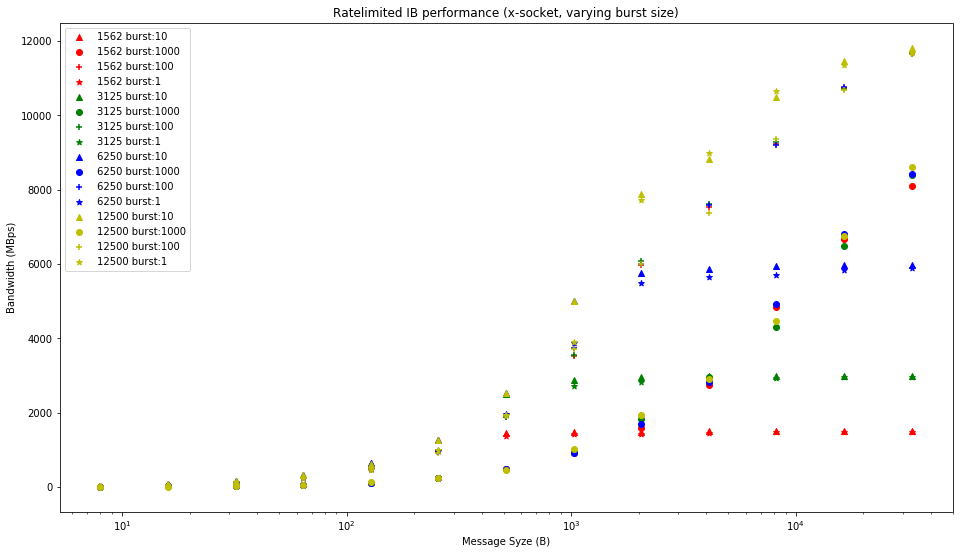

In [94]:
df = xsocket
plotdata = {}

#Generate the data
for rl in rls:
    plotdata[rl] = {}
    for bs in df.BurstSize.unique():
        plotdata[rl][bs] = {}
        plotdata[rl][bs]["xs"] = []
        plotdata[rl][bs]["ys"] = []
        for m in msgs:

            vals = df[df.MsgSize == m][df.RateLimit == rl][df.BurstSize == bs].AvgBW.values
            for val in vals:
                plotdata[rl][bs]["ys"] += [float(val)]
                plotdata[rl][bs]["xs"] += [int(m)]
#Plot the data with a color for each ratelimit and shape for each burst size  
fig, ax = plt.subplots(figsize=(16,9))
rlcolors=['r','g','b','y']
rlidx = 0
burstshapes={1000:'o', 100:'+', 10:'^', 1:'*'}
for k in plotdata.keys():
    for bk in plotdata[k].keys():
        print(type(bk))
        ax.scatter(plotdata[k][bk]["xs"], plotdata[k][bk]["ys"], label=str(k)+" burst:{}".format(bk), marker=burstshapes[bk], color=rlcolors[rlidx])
    rlidx += 1
ax.set_xscale('log')
ax.legend()
ax.set_ylabel("Bandwidth (MBps)")
ax.set_xlabel("Message Syze (B)")
ax.set_title("Ratelimited IB performance (x-socket, varying burst size)")
plt.show()

In [95]:
df = xnode
plotdata = {}

#Generate the data
for rl in rls:
    plotdata[rl] = {}
    for bs in df.BurstSize.unique():
        plotdata[rl][bs] = {}
        plotdata[rl][bs]["xs"] = []
        plotdata[rl][bs]["ys"] = []
        for m in msgs:

            vals = df[df.MsgSize == m][df.RateLimit == rl][df.BurstSize == bs].AvgBW.values
            for val in vals:
                plotdata[rl][bs]["ys"] += [float(val)]
                plotdata[rl][bs]["xs"] += [int(m)]
#Plot the data with a color for each ratelimit and shape for each burst size  
fig, ax = plt.subplots(figsize=(16,9))
rlcolors=['r','g','b','y']
rlidx = 0
burstshapes={1000:'o', 100:'+', 10:'^', 1:'*'}
for k in plotdata.keys():
    for bk in plotdata[k].keys():
        print(type(bk))
        ax.scatter(plotdata[k][bk]["xs"], plotdata[k][bk]["ys"], label=str(k)+" burst:{}".format(bk), marker=burstshapes[bk], color=rlcolors[rlidx])
    rlidx += 1
ax.set_xscale('log')
ax.legend()
ax.set_ylabel("Bandwidth (MBps)")
ax.set_xlabel("Message Syze (B)")
ax.set_title("Ratelimited IB performance (x-node, varying burst size)")
plt.show()

/Users/tgroves/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>


In [39]:
ys

['39.12',
 '27.91',
 '7.52',
 '30.19',
 '55.74',
 '14.16',
 '78.24',
 '60.13',
 '117.38',
 '156.32',
 '120.56',
 '31.15',
 '310.70',
 '63.78',
 '240.17',
 '216.77',
 '481.92',
 '624.80',
 '467.31',
 '126.68',
 '243.68',
 '885.87',
 '1238.80',
 '961.74',
 '475.76',
 '1763.38',
 '1368.29',
 '1437.72',
 '1409.90',
 '994.28',
 '3506.24',
 '1478.40',
 '5966.20',
 '1493.21',
 '1683.57',
 '1425.71',
 '1497.71',
 '7436.66',
 '1458.99',
 '2931.81',
 '1500.49',
 '1473.90',
 '9346.21',
 '4594.77',
 '10832.60',
 '1482.68',
 '6728.61',
 '1501.60',
 '1486.32',
 '11585.85',
 '8296.59',
 '1501.97',
 '38.59',
 '30.11',
 '7.63',
 '29.15',
 '77.09',
 '58.31',
 '60.33',
 '15.70',
 '156.85',
 '117.20',
 '31.13',
 '120.42',
 '55.56',
 '240.94',
 '231.25',
 '309.89',
 '109.58',
 '617.73',
 '444.10',
 '493.10',
 '964.52',
 '887.39',
 '247.93',
 '1245.54',
 '2489.14',
 '1923.35',
 '433.45',
 '1834.00',
 '936.20',
 '2874.65',
 '3652.21',
 '2712.37',
 '2824.72',
 '1827.56',
 '2949.33',
 '6142.05',
 '7517.79',
 '